**Disclaimer:** Homework assignment for Johns Hopkins University, EN.553.635.01.SP25 – Bayesian Statistics for the Physical Sciences.

**Exercise 1.3** (First Simulation-based Inference) You have lost your keys on your way to the park. Parameterize the location of the keys with parameter $\theta$. $\theta$ can vary between 0 (directly in front of your home) and 1 (the park). Assume that a priori you could have lost your keys anywhere in this interval (between 0 and 1 ) with equal probability.

(a) Write a computer code that generates $\theta$ from the prior $p(\theta)$.

Since $\theta$ can vary between 0 and 1, we can generate $\theta$ from the uniform distribution.

In [1]:
import numpy as np
np.random.seed(42)

# Generate theta from the prior
theta = np.random.uniform(0, 1)
print(theta)

0.3745401188473625


(b) Luckily your keys have a radio transmitter, and you are carrying a receiver. You are at the front of your house. Assume you receive an intensity of $I=\frac{1}{\theta^2+0.01}$ if your keys are at position $\theta$. Now write a function that computes the intensity $I(\theta)$. Show the distribution of $I(\theta)$ when $\theta$ is drawn from $p(\theta)$.

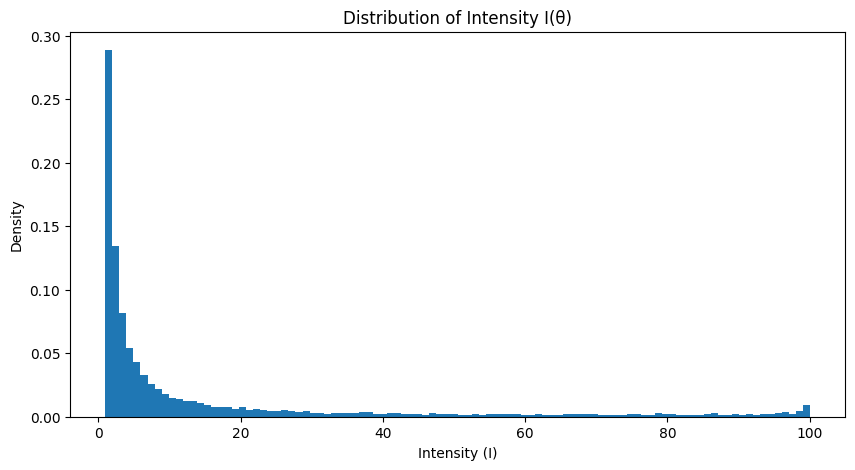

In [11]:
import matplotlib.pyplot as plt

theta_samples = np.random.uniform(0, 1, 10000)
# Intensity function
I_samples = 1 / (theta_samples**2 + 0.01)

plt.figure(figsize=(10, 5))
plt.hist(I_samples, bins=100, density=True)
plt.xlabel('Intensity (I)')
plt.ylabel('Density')
plt.title('Distribution of Intensity I(θ)')
plt.show()


(c) Your receiver is noisy and you measure $d=I+n$, where $n$ is drawn from a normal (Gaussian) pdf with mean zero and variance 0.25 , i.e., $N(0,0.25)$. Write a function that draws $d$ from the likelihood $p(d \mid \theta)$ for some $\theta$.

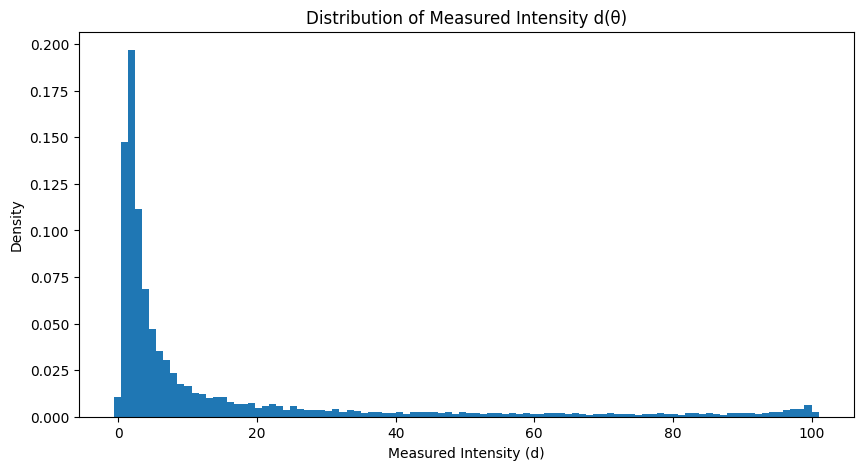

In [12]:
def generate_measurement(theta):
    """
    Generate a measurement d from the likelihood p(d|θ)
    
    Returns:
    d: measured intensity with noise
    """
    # Intensity
    I = 1 / (theta**2 + 0.01)
    # Gaussian noise N(0, 0.25)
    noise = np.random.normal(0, np.sqrt(0.25)) # use std
    d = I + noise
    
    return d

n_samples = 10000
theta_samples = np.random.uniform(0, 1, n_samples)
d_samples = [generate_measurement(theta) for theta in theta_samples]

plt.figure(figsize=(10, 5))
plt.hist(d_samples, bins=100, density=True)
plt.xlabel('Measured Intensity (d)')
plt.ylabel('Density')
plt.title('Distribution of Measured Intensity d(θ)')
plt.show()

(d) Make a plot of the point cloud of 1000 pairs $(d, \theta)$ drawn from the joint $\operatorname{pdf} p(d, \theta)$.

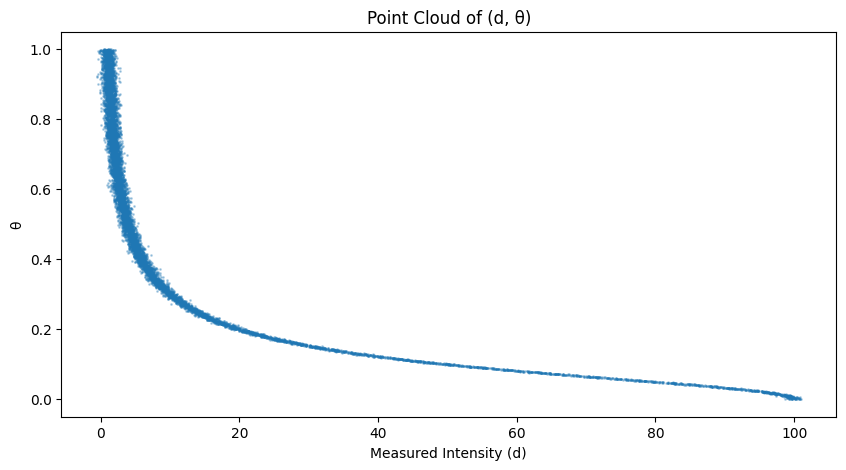

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(d_samples, theta_samples, alpha=0.3, s=1) # (d, theta)
plt.xlabel('Measured Intensity (d)')
plt.ylabel('θ')
plt.title('Point Cloud of (d, θ)')
plt.show()

(e) Take the true location to be $\theta^*=0.5$. Generate your "true data" $d^*$ from $p\left(d \mid \theta^*\right)$.

In [17]:
theta_star = 0.5
d_true = generate_measurement(theta_star)
print(f"True data: d = {d_true}")


True data: d = 3.701681095345971


(f) Now estimate the posterior pdf $p(\theta \mid d)$ by histogramming all the $\theta$ belonging to data samples that are within $\epsilon=0.1$ of $d^*$.

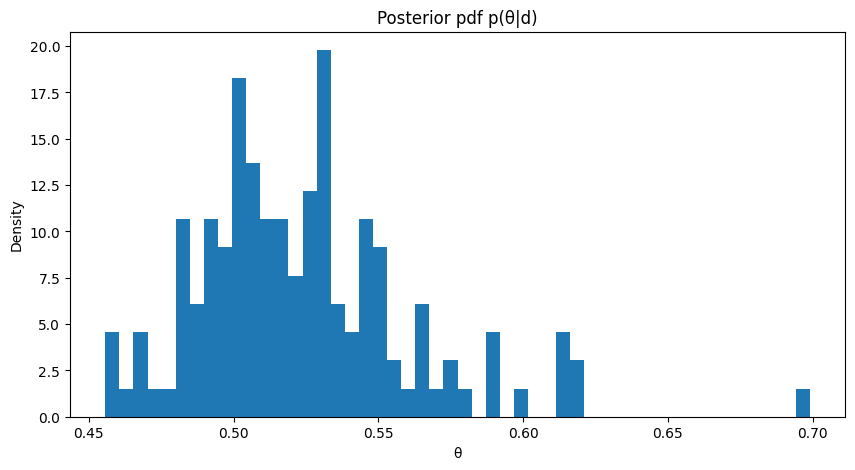

In [41]:
epsilon = 0.1

# Find the indices of data points within epsilon of d_true
indices = []
for i in range(len(d_samples)):
    if d_samples[i] < d_true + epsilon and d_samples[i] > d_true - epsilon:
        indices.append(i)

theta_values = theta_samples[indices]

plt.figure(figsize=(10, 5))
plt.hist(theta_values, bins=50, density=True)
plt.xlabel('θ')
plt.ylabel('Density')
plt.title('Posterior pdf p(θ|d)')
plt.show()

(g) Optional: Think about whether the posterior "agrees" with the true value. Experiment with different values of $\epsilon$ between 0 and 1 to see how the histogram changes.

The true value of $\theta$ is 0.5 and the histogram generally center around 0.5 for small epsilons, but as epsilon increases, the histogram spreads out with more samples in, the center is shifted to the right possibly due to the greater range introduced more uncertainty(noise).

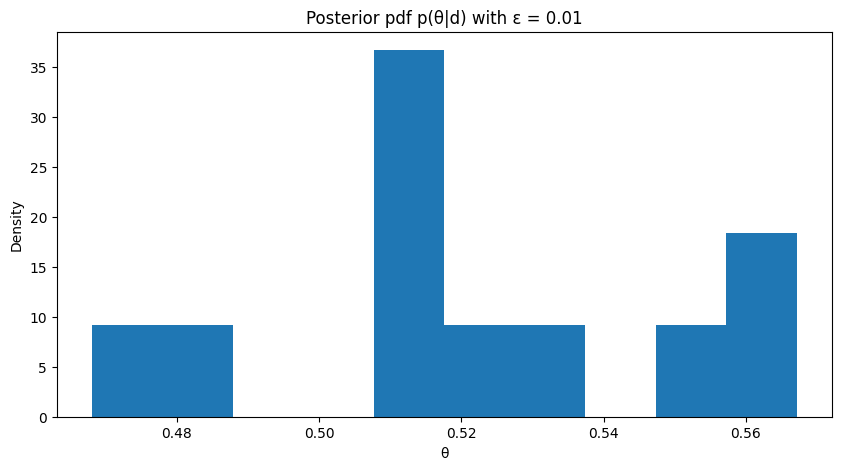

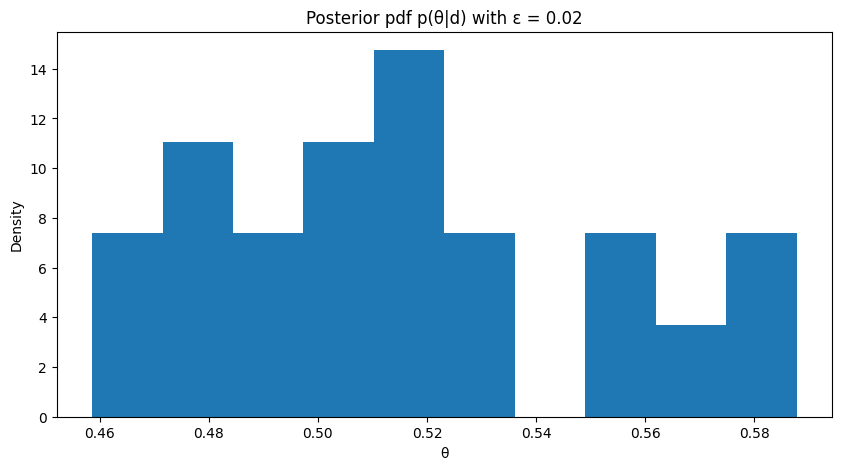

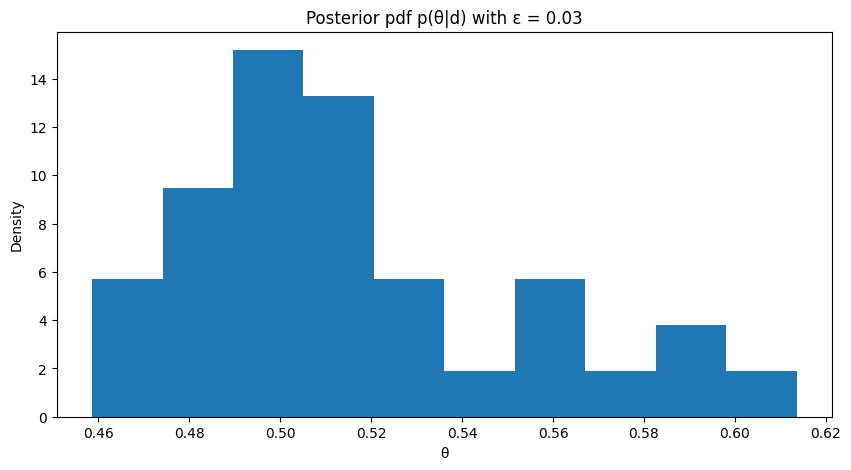

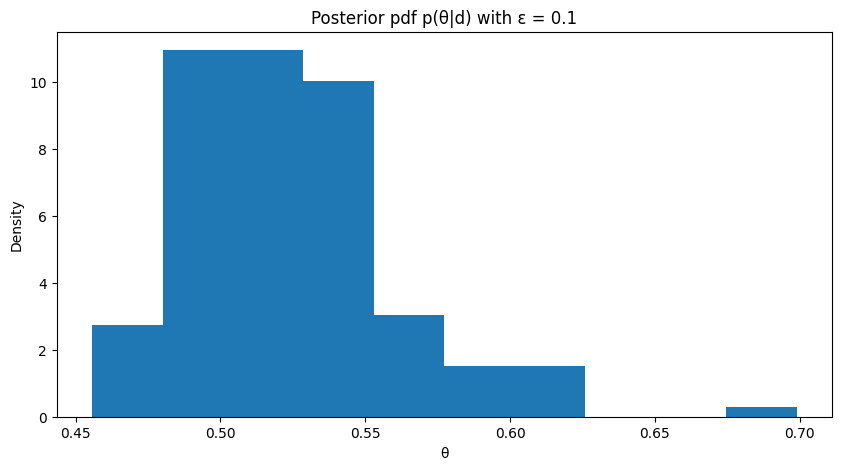

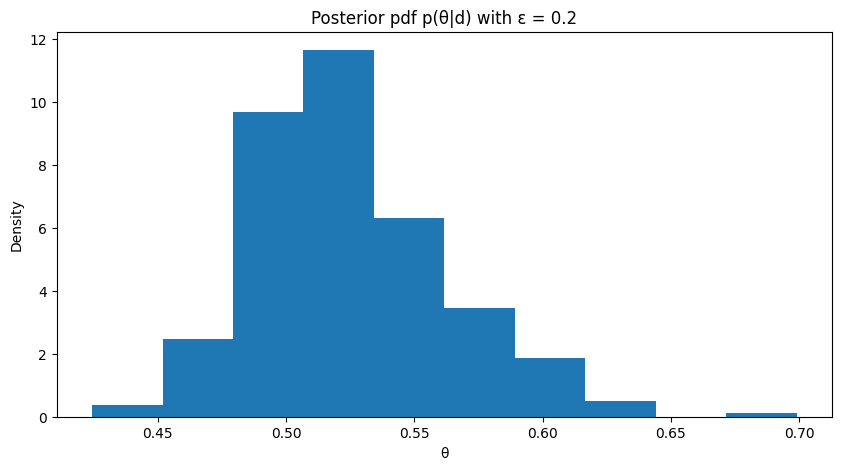

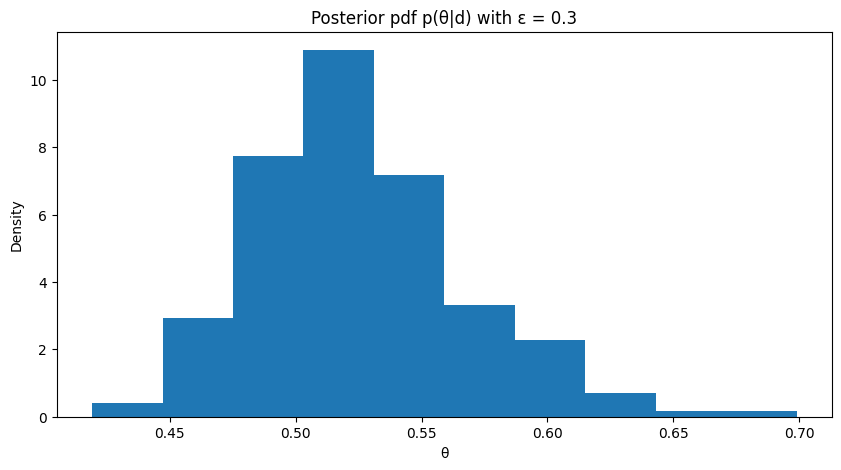

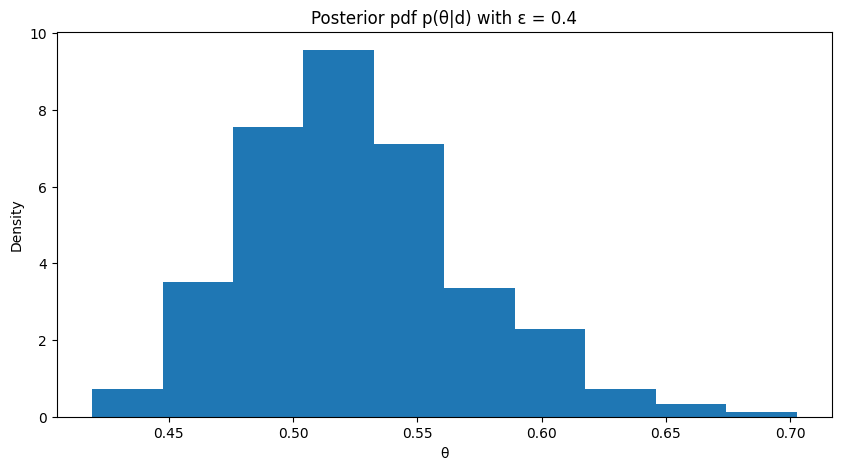

In [42]:
epsilons = [0.01, 0.02, 0.03, 0.1, 0.2, 0.3, 0.4]

for eps in epsilons:
    indices = []
    for i in range(len(d_samples)):
        if d_samples[i] < d_true + eps and d_samples[i] > d_true - eps:
            indices.append(i)
    theta_values = theta_samples[indices]

    plt.figure(figsize=(10, 5))
    plt.hist(theta_values, bins=10, density=True)
    plt.xlabel('θ')
    plt.ylabel('Density')
    plt.title(f'Posterior pdf p(θ|d) with ε = {eps}')
    plt.show()

**Exercise 1.4** (The Importance of Prior Probabilities) A medical test is designed to detect a rare disease. The test has an overall accuracy of $99 \%$, meaning that it correctly classifies both diseased and non-diseased individuals $99 \%$ of the time. The disease itself occurs in only 1 out of 1 million people in the general population. If a randomly selected person tests positive, what is the probability that they actually have the disease?

In [30]:
p_positive_disease = 0.99 # 99% accuracy
p_disease = 1 / 1000000 # 1 in 1 million people have the disease

p_positive = p_positive_disease * p_disease + (1 - p_positive_disease) * (1 - p_disease)

p_disease_positive = p_positive_disease * p_disease / p_positive

print(f"The probability that a person who tests positive actually has the disease is: {p_disease_positive:.6f}")


The probability that a person who tests positive actually has the disease is: 0.000099


**Exercise 1.5** (Use "integrating by differentiating" for mean, covariance, and normalization!) Assume $x$ is a vector with $n$ entries and that

$$
P(x \mid \mu, C)=\frac{e^{-\frac{1}{2}(x-\mu)^T C^{-1}(x-\mu)}}{\sqrt{|2 \pi C|}}
$$

(a) Hence compute the mean and covariance matrix of the product of two Gaussian pdfs

$$
Q(x)=P\left(x \mid \mu_1, C_1\right) P\left(x \mid \mu_2, C_2\right)
$$


Note that this is not a probability density, because it does not integrate to 1 . But the "integrating by differentiating" techniques do not require working out the normalization factor. This is one reason why they are so convenient.


$$
\begin{aligned}
Q(x) &= P\left(x \mid \mu_1, C_1\right) P\left(x \mid \mu_2, C_2\right) \\
     &= \frac{e^{-\frac{1}{2}(x-\mu_1)^{\top} C_1^{-1}(x-\mu_1)}}{\sqrt{|2 \pi C_1|}} \cdot \frac{e^{-\frac{1}{2}(x-\mu_2)^{\top} C_2^{-1}(x-\mu_2)}}{\sqrt{|2 \pi C_2|}} \\
     &= \frac{e^{-\frac{1}{2}(x-\mu_1)^{\top} C_1^{-1}(x-\mu_1)} \cdot e^{-\frac{1}{2}(x-\mu_2)^{\top} C_2^{-1}(x-\mu_2)}}{\sqrt{|2 \pi C_1|} \cdot \sqrt{|2 \pi C_2|}} \\
     &\propto \exp\left({-\frac{1}{2} x^{\top} \left(C_1^{-1} + C_2^{-1}\right) x} + x^{\top} \left(C_1^{-1} \mu_1 + C_2^{-1} \mu_2\right)\right)
\end{aligned}
$$
So now the covariance matrix of $Q(x)$ is $\Sigma = \left(C_1^{-1} + C_2^{-1}\right)^{-1}$ and the mean is $\mu = \Sigma \left(C_1^{-1} \mu_1 + C_2^{-1} \mu_2\right)$.

If we are using the integration by differentiating technique:<br>
$$
\begin{aligned}
\log Q(x) &= -\frac{1}{2}(x-\mu_1)^{\top} C_1^{-1}(x-\mu_1) -\frac{1}{2}(x-\mu_2)^{\top} C_2^{-1}(x-\mu_2) \\
\frac{\partial \log Q(x)}{\partial \mu_1} + \frac{\partial \log Q(x)}{\partial \mu_2} &= \frac{x - \mu_1}{C_1} + \frac{x - \mu_2}{C_2} = 0 \\
\left(C_1^{-1} + C_2^{-1}\right) x &= C_1^{-1} \mu_1 + C_2^{-1} \mu_2 \\
x &= \left(C_1^{-1} + C_2^{-1}\right)^{-1} \left(C_1^{-1} \mu_1 + C_2^{-1} \mu_2\right)
\end{aligned}
$$
Differentiating with respect to $\mu_i$ again, we get:<br>
$$
|\frac{\partial^2 \log Q(x)}{\partial \mu_1^2} + \frac{\partial^2 \log Q(x)}{\partial \mu_2^2}| = |C_1^{-1} + C_2^{-1}|
$$
Exactly as my previous computation.

(b) Now that you know the mean and covariance of $p(x)$, and using the fact that the product of two Gaussian pdfs is still a Gaussian pdf, write down $P(x)$, the normalized pdf for $x$.

Given the mean and covariance matrix of $Q(x)$, we can write down the normalized pdf for $x$ as:
$$
P(x)=\frac{1}{\sqrt{(2 \pi)^n|\Sigma|}} \exp \left(-\frac{1}{2}(x-\mu)^T \Sigma^{-1}(x-\mu)\right)
$$

where:
- $\mu=\Sigma\left(C_1^{-1} \mu_1+C_2^{-1} \mu_2\right)$
- $\boldsymbol{\Sigma}=\left(C_1^{-1}+C_2^{-1}\right)^{-1}$

(c) Since

$$
P(x)=c Q(x)=c P\left(x \mid \mu_1, C_1\right) P\left(x \mid \mu_2, C_2\right)
$$

calculate the normalization constant $c$. (Hint: This part goes beyond what we did in class, but there is still no integration required-just division!)

Since in (a) I computed the Q(x) proportional and in (b) I computed the normalized pdf P(x), the normalization constant $c$ is the ratio of the two:<br>
$$
c=\frac{\sqrt{\left|2 \pi C_1\right|} \cdot \sqrt{\left|2 \pi C_2\right|}}{\sqrt{(2 \pi)^n|\Sigma|}}=\sqrt{\frac{\left|2 \pi C_1\right| \cdot\left|2 \pi C_2\right|}{(2 \pi)^n|\Sigma|}}==\sqrt{\frac{\left|C_1\right| \cdot\left|C_2\right|}{|\Sigma|}} \cdot(2 \pi)^{\frac{n}{2}-1}
$$